# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing datset

In [2]:
df = pd.read_csv('C:\\Users\\Apoorv\\Downloads\\Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Preprocessing

In [3]:
df = df.drop(columns = ["customer_id"])
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 11)

In [5]:
# define numerical & categorical columns
#numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
#categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [6]:
#num_df = df[numeric_features]
#cat_df = df[categorical_features]

In [7]:
#num_df.head()

In [8]:
#cat_df.head()

## One Hot Encoding (On Categorical Variables)

In [9]:
#cat_df = pd.get_dummies(cat_df)
#cat_df.head()

## MinMaxScaler and PCA (On Numerical Variables)

### MinMaxScaler

In [10]:
#from sklearn.preprocessing import MinMaxScaler
#
#scaler = MinMaxScaler()
#scaled_num_df_array = scaler.fit_transform(num_df)
#scaled_num_df = pd.DataFrame(scaled_num_df_array, columns=num_df.columns)
#scaled_num_df

### PCA

In [11]:
#from sklearn.decomposition import PCA
#
#pca = PCA()
#x_pca_check = pca.fit_transform(scaled_num_df)
#
## plot scree plot
#plt.plot(range(1, pca.n_components_+1), pca.explained_variance_, 'o-', color='blue')
#plt.xlabel('Component Number')
#plt.ylabel('Eigenvalue')
#plt.title('Scree Plot')
#plt.xticks(range(1, pca.n_components_+1))
#plt.show()

In [12]:
#pca = PCA(n_components=2)
#pca_num_df = pca.fit_transform(scaled_num_df)
#pca_num_df

In [13]:
#df = pd.concat([pd.DataFrame(pca_num_df), cat_df], axis=1)

In [14]:
#df

In [15]:
df = pd.get_dummies(df)
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


# Training the Model

In [16]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
X = df.drop(["churn"], axis=1)
y = df["churn"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [20]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

X_train,y_train = X_resampled, y_resampled

In [21]:
#from imblearn.over_sampling import RandomOverSampler
#
#ros = RandomOverSampler(random_state=42)
#X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
#
#X_train,y_train = X_resampled, y_resampled

### 1. Logistic Regression

In [22]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring = 'roc_auc')
grid_search.fit(X_train, y_train)

rf_best_parameters = grid_search.best_params_
rf_best_score = grid_search.best_score_

print("Best Parameters:", rf_best_parameters)
print("Best Score:", rf_best_score)

Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.7671135667393326


In [23]:
model_lg = LogisticRegression(C = 100, penalty = 'l1', solver = 'liblinear')
model_lg.fit(X_train, y_train)
y_pred_lg = model_lg.predict(X_test)

acc = accuracy_score(y_test, y_pred_lg)
prec = precision_score(y_test, y_pred_lg)
rec = recall_score(y_test, y_pred_lg)
f1 = f1_score(y_test, y_pred_lg)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

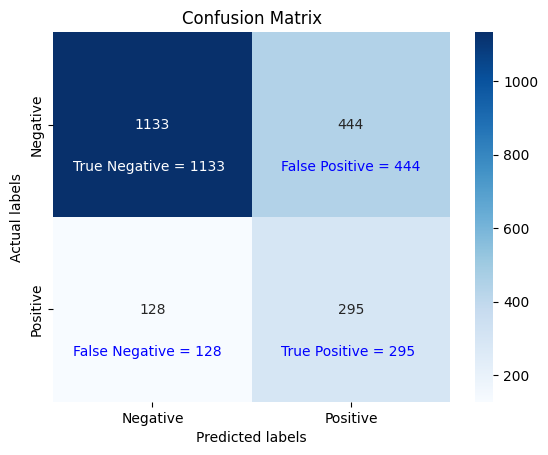

In [24]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lg)

# plot the confusion matrix
sn.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# set the axis labels
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')

# set the title and labels for the four categories
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.text(0.10, 0.75, 'True Negative = {}'.format(cm[0,0]), size=10, color='white')
plt.text(0.10, 1.75, 'False Negative = {}'.format(cm[1,0]), size=10, color='blue')
plt.text(1.15, 0.75, 'False Positive = {}'.format(cm[0,1]), size=10, color='blue')
plt.text(1.15, 1.75, 'True Positive = {}'.format(cm[1,1]), size=10, color='blue')

plt.show()

### 2. K-Nearest Neighbor

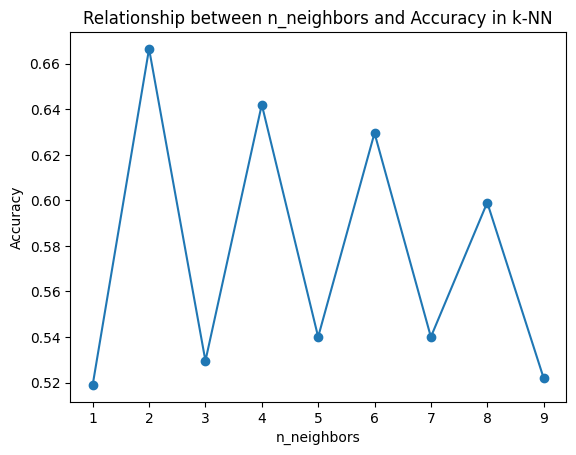

In [25]:
n_neighbors_list = list(range(1, 10))

accuracy_scores = []
for n_neighbors in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    accuracy_scores.append(knn.score(X_test, y_test))

# Plot the accuracy scores against different values of n_neighbors
plt.plot(n_neighbors_list, accuracy_scores, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Relationship between n_neighbors and Accuracy in k-NN')
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [2], 
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring = 'roc_auc')
grid_search.fit(X_train, y_train)

rf_best_parameters = grid_search.best_params_
rf_best_score = grid_search.best_score_

print("Best Parameters:", rf_best_parameters)
print("Best Score:", rf_best_score)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}
Best Score: 0.5120676385126387


In [27]:
model_knn = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform', algorithm = 'auto')
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

acc = accuracy_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn)
rec = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

model_results = pd.DataFrame([['K-Nearest Neighbour', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

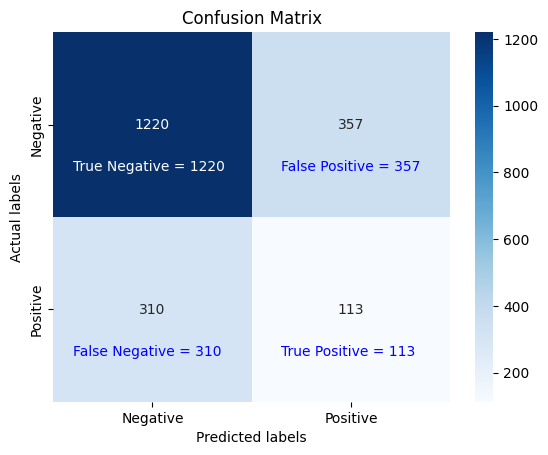

In [28]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_knn)

# plot the confusion matrix
sn.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# set the axis labels
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')

# set the title and labels for the four categories
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.text(0.10, 0.75, 'True Negative = {}'.format(cm[0,0]), size=10, color='white')
plt.text(0.10, 1.75, 'False Negative = {}'.format(cm[1,0]), size=10, color='blue')
plt.text(1.15, 0.75, 'False Positive = {}'.format(cm[0,1]), size=10, color='blue')
plt.text(1.15, 1.75, 'True Positive = {}'.format(cm[1,1]), size=10, color='blue')

plt.show()

### 3. Naive Bayes

In [29]:
from sklearn.model_selection import GridSearchCV

nb = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
          'priors': [None, [0.25, 0.25, 0.25, 0.25], [0.2, 0.2, 0.3, 0.3]]}

grid_search = GridSearchCV(nb, param_grid, cv=5, scoring = 'roc_auc')
grid_search.fit(X_train, y_train)

rf_best_parameters = grid_search.best_params_
rf_best_score = grid_search.best_score_

print("Best Parameters:", rf_best_parameters)
print("Best Score:", rf_best_score)

Best Parameters: {'priors': None, 'var_smoothing': 1e-09}
Best Score: 0.746415433641629


In [30]:
model_nb = GaussianNB(priors = None, var_smoothing = 1e-09)
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

acc = accuracy_score(y_test, y_pred_nb)
prec = precision_score(y_test, y_pred_nb)
rec = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)

model_results = pd.DataFrame([['Naive Bayes', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

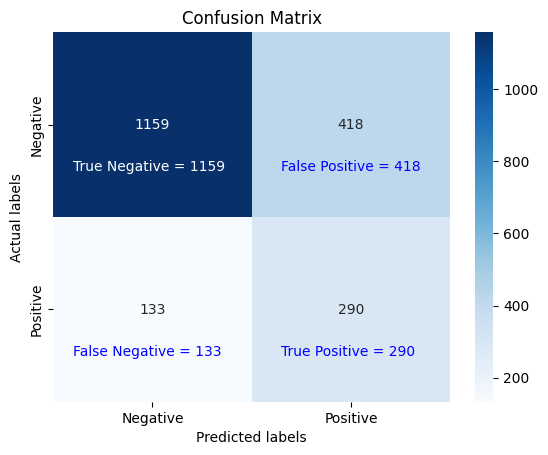

In [31]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_nb)

# plot the confusion matrix
sn.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# set the axis labels
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')

# set the title and labels for the four categories
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.text(0.10, 0.75, 'True Negative = {}'.format(cm[0,0]), size=10, color='white')
plt.text(0.10, 1.75, 'False Negative = {}'.format(cm[1,0]), size=10, color='blue')
plt.text(1.15, 0.75, 'False Positive = {}'.format(cm[0,1]), size=10, color='blue')
plt.text(1.15, 1.75, 'True Positive = {}'.format(cm[1,1]), size=10, color='blue')

plt.show()

### 4. Support Vector Machine

In [32]:
import time
t0 = time.time()

In [33]:
model_svm = SVC(kernel = 'linear', probability=True)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

acc = accuracy_score(y_test, y_pred_svm)
prec = precision_score(y_test, y_pred_svm)
rec = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

model_results = pd.DataFrame([['Support Vector Machine', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [34]:
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 1476.01 seconds


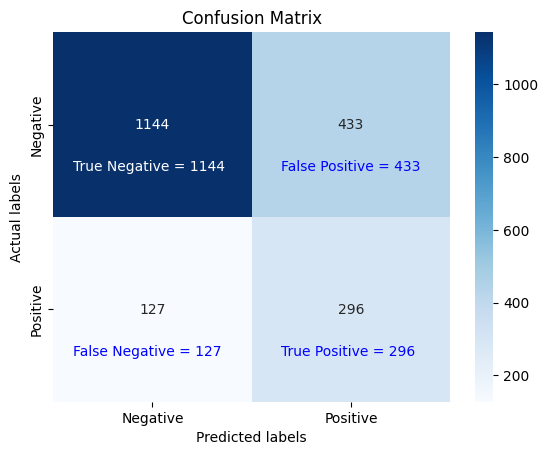

In [35]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_svm)

# plot the confusion matrix
sn.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# set the axis labels
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')

# set the title and labels for the four categories
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.text(0.10, 0.75, 'True Negative = {}'.format(cm[0,0]), size=10, color='white')
plt.text(0.10, 1.75, 'False Negative = {}'.format(cm[1,0]), size=10, color='blue')
plt.text(1.15, 0.75, 'False Positive = {}'.format(cm[0,1]), size=10, color='blue')
plt.text(1.15, 1.75, 'True Positive = {}'.format(cm[1,1]), size=10, color='blue')

plt.show()

### 5. Decision Tree

In [36]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
param_grid = {'max_depth': [2, 4, 6, 8], 
              'min_samples_leaf': [1, 2, 4, 8]}

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring = 'roc_auc')
grid_search.fit(X_train, y_train)

rf_best_parameters = grid_search.best_params_
rf_best_score = grid_search.best_score_

print("Best Parameters:", rf_best_parameters)
print("Best Score:", rf_best_score)

Best Parameters: {'max_depth': 6, 'min_samples_leaf': 4}
Best Score: 0.8443686536541206


In [38]:
model_dt = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 4, random_state=2023)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

acc = accuracy_score(y_test, y_pred_dt)
prec = precision_score(y_test, y_pred_dt)
rec = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

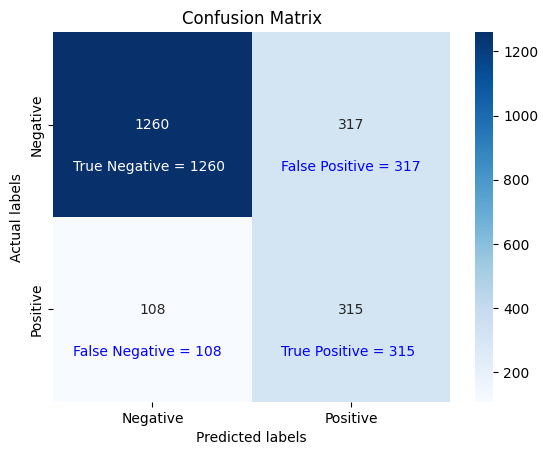

In [39]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_dt)

# plot the confusion matrix
sn.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# set the axis labels
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')

# set the title and labels for the four categories
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.text(0.10, 0.75, 'True Negative = {}'.format(cm[0,0]), size=10, color='white')
plt.text(0.10, 1.75, 'False Negative = {}'.format(cm[1,0]), size=10, color='blue')
plt.text(1.15, 0.75, 'False Positive = {}'.format(cm[0,1]), size=10, color='blue')
plt.text(1.15, 1.75, 'True Positive = {}'.format(cm[1,1]), size=10, color='blue')

plt.show()

### 6. Random Forest

In [40]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param_grid = {"max_depth": [3, None],
              "max_features": [1, 7, 10, 12],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring = 'roc_auc')
grid_search.fit(X_train, y_train)

rf_best_parameters = grid_search.best_params_
rf_best_score = grid_search.best_score_

print("Best Parameters:", rf_best_parameters)
print("Best Score:", rf_best_score)

Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 10, 'min_samples_split': 5}
Best Score: 0.8642557594766057


In [41]:
model_rf = RandomForestClassifier(bootstrap = True, 
                                  criterion = 'entropy', 
                                  max_depth = None, 
                                  max_features = 7, 
                                  min_samples_leaf = 10, 
                                  min_samples_split = 5, 
                                  random_state=2023)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)

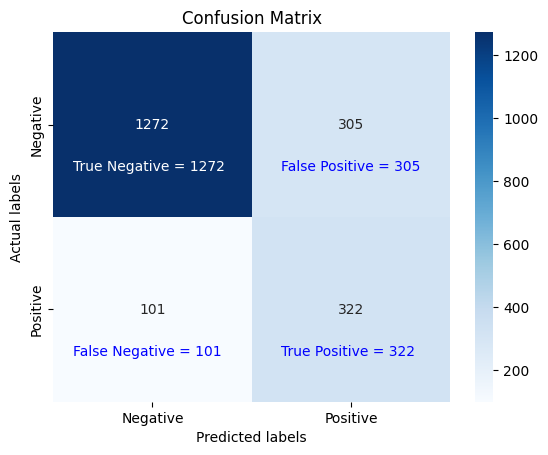

In [43]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)

# plot the confusion matrix
sn.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# set the axis labels
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')

# set the title and labels for the four categories
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.text(0.10, 0.75, 'True Negative = {}'.format(cm[0,0]), size=10, color='white')
plt.text(0.10, 1.75, 'False Negative = {}'.format(cm[1,0]), size=10, color='blue')
plt.text(1.15, 0.75, 'False Positive = {}'.format(cm[0,1]), size=10, color='blue')
plt.text(1.15, 1.75, 'True Positive = {}'.format(cm[1,1]), size=10, color='blue')

plt.show()

In [44]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.7140,0.399188,0.697400,0.507745
1,K-Nearest Neighbour,0.6665,0.240426,0.267139,0.253080
2,Naive Bayes,0.7245,0.409605,0.685579,0.512821
3,Support Vector Machine,0.7200,0.406036,0.699764,0.513889
4,Decision Tree,0.7880,0.499218,0.754137,0.600753
5,Decision Tree,0.7875,0.498418,0.744681,0.597156
6,Random Forest,0.7970,0.513557,0.761229,0.613333


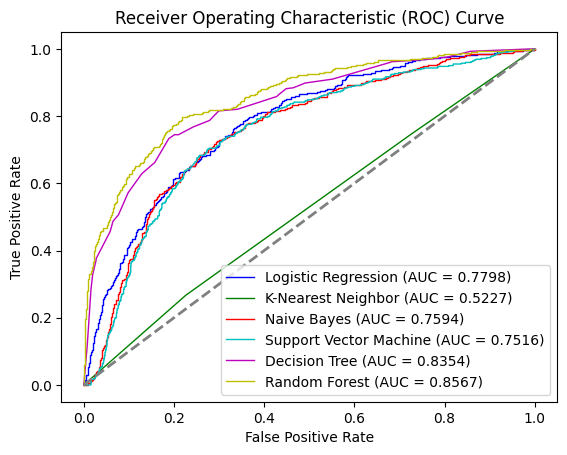

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score_lg = model_lg.predict_proba(X_test)[:, 1]
y_score_knn = model_knn.predict_proba(X_test)[:, 1]
y_score_nb = model_nb.predict_proba(X_test)[:, 1]
y_score_svm = model_svm.predict_proba(X_test)[:, 1]
y_score_dt = model_dt.predict_proba(X_test)[:, 1]
y_score_rf = model_rf.predict_proba(X_test)[:, 1]

fpr_lg, tpr_lg, _ = roc_curve(y_test, y_score_lg)
roc_auc_lg = auc(fpr_lg, tpr_lg)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_score_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)


# plot the ROC curves
plt.plot(fpr_lg, tpr_lg, color='b', lw=1, label='Logistic Regression (AUC = %0.4f)' % roc_auc_lg)
plt.plot(fpr_knn, tpr_knn, color='g', lw=1, label='K-Nearest Neighbor (AUC = %0.4f)' % roc_auc_knn)
plt.plot(fpr_nb, tpr_nb, color='r', lw=1, label='Naive Bayes (AUC = %0.4f)' % roc_auc_nb)
plt.plot(fpr_svm, tpr_svm, color='c', lw=1, label='Support Vector Machine (AUC = %0.4f)' % roc_auc_svm)
plt.plot(fpr_dt, tpr_dt, color='m', lw=1, label='Decision Tree (AUC = %0.4f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='y', lw=1, label='Random Forest (AUC = %0.4f)' % roc_auc_rf)

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend(loc="lower right", prop={'size': 10})
plt.show()

## K-fold Cross Validation

In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = model_rf, X = X_train, y = y_train, cv = 10, scoring = 'roc_auc')
print("Random Forest Classifier Scores: %0.2f (+/- %0.2f)"  % (scores.mean(), scores.std() * 2))

Random Forest Classifier Scores: 0.86 (+/- 0.03)


In [53]:
results 

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.7140,0.399188,0.697400,0.507745
1,K-Nearest Neighbour,0.6665,0.240426,0.267139,0.253080
2,Naive Bayes,0.7245,0.409605,0.685579,0.512821
3,Support Vector Machine,0.7200,0.406036,0.699764,0.513889
4,Decision Tree,0.7880,0.499218,0.754137,0.600753
5,Decision Tree,0.7875,0.498418,0.744681,0.597156
6,Random Forest,0.7970,0.513557,0.761229,0.613333


In [52]:
result = results[0:5].append(results[6:])
result

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.7140,0.399188,0.697400,0.507745
1,K-Nearest Neighbour,0.6665,0.240426,0.267139,0.253080
2,Naive Bayes,0.7245,0.409605,0.685579,0.512821
3,Support Vector Machine,0.7200,0.406036,0.699764,0.513889
4,Decision Tree,0.7880,0.499218,0.754137,0.600753
6,Random Forest,0.7970,0.513557,0.761229,0.613333
